In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/data/processed/synthetic_cabin_ir/Rear_Mirror')
annotation_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/'

train_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_normalize_to_bbox=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_normalize_to_bbox=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_normalize_to_bbox=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs


train_dataset 37499 val_dataset 6250 test_dataset 6251


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 1325.4941701889038
activity_macro_mpjpe nan


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/conda/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/opt/conda/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-k76nuarr'


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 323.02773785259984
val MPJPE from: 6208 samples : 49.60234463214874
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2925 batches: 60.51790165086078
val MPJPE from: 6208 samples : 38.12725096940994
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2925 batches: 50.4674134346155
val MPJPE from: 6208 samples : 32.417625188827515
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2925 batches: 47.43482684477782
val MPJPE from: 6208 samples : 31.92354366183281
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2925 batches: 45.22658025479724
val MPJPE from: 6208 samples : 31.365763396024704
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2925 batches: 43.41826336888167
val MPJPE from: 6208 samples : 29.979651793837547
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2925 batches: 41.82624723412033
val MPJPE from: 6208 samples : 29.329728335142136
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2925 batches: 40.578374467853806
val MPJPE from: 6208 samples : 27.85485051572323
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2925 batches: 39.64618340516702
val MPJPE from: 6208 samples : 27.747539803385735
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2925 batches: 38.840925431149635
val MPJPE from: 6208 samples : 27.671869844198227
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2925 batches: 38.242844752012154
val MPJPE from: 6208 samples : 27.339478954672813
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #12
training loss from 2925 batches: 37.66634098739705
val MPJPE from: 6208 samples : 26.90086141228676
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #13
training loss from 2925 batches: 37.20195421678388
val MPJPE from: 6208 samples : 26.729686185717583
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #14
training loss from 2925 batches: 36.86302507152924
val MPJPE from: 6208 samples : 26.60333178937435
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #15
training loss from 2925 batches: 36.53948972304153
val MPJPE from: 6208 samples : 26.326926425099373
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #16
training loss from 2925 batches: 36.33011131650872
val MPJPE from: 6208 samples : 26.457125321030617
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #17
training loss from 2925 batches: 36.18392706044719
val MPJPE from: 6208 samples : 26.227012276649475
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #18
training loss from 2925 batches: 35.97245926148871
val MPJPE from: 6208 samples : 25.89237131178379
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #19
training loss from 2925 batches: 35.833207643949066
val MPJPE from: 6208 samples : 26.03597566485405
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #20
training loss from 2925 batches: 35.69288443423744
val MPJPE from: 6208 samples : 25.863664224743843
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #21
training loss from 2925 batches: 35.61779858210148
val MPJPE from: 6208 samples : 26.474611833691597
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #22
training loss from 2925 batches: 35.574983633481544
val MPJPE from: 6208 samples : 26.1534471064806
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #23
training loss from 2925 batches: 35.49637840790117
val MPJPE from: 6208 samples : 25.705486536026
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #24
training loss from 2925 batches: 35.460202721321686
val MPJPE from: 6208 samples : 26.869626715779305
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #25
training loss from 2925 batches: 35.452767205544006
val MPJPE from: 6208 samples : 26.59899927675724
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #26
training loss from 2925 batches: 35.445276591130806
val MPJPE from: 6208 samples : 26.120023801922798
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #27
training loss from 2925 batches: 35.37399014028219
val MPJPE from: 6208 samples : 26.32695622742176
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #28
training loss from 2925 batches: 35.35431464640503
val MPJPE from: 6208 samples : 26.566892862319946
activity_macro_mpjpe nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_0/checkpoints/epoch=114-step=67275.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_0/checkpoints/epoch=114-step=67275.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 27.665679252368857
PJPE
                     PJPE
nose            16.602589
left_eye        17.416731
right_eye       16.853684
left_ear        15.377198
right_ear       14.915032
left_shoulder   15.851820
right_shoulder  15.849968
left_elbow      59.927729
right_elbow     40.599683
left_wrist      37.740945
right_wrist     50.526143
left_hip        32.218811
right_hip       25.557691
activities_mpjpe:
{}
test mpjpe: 27.665679252368857
activity_macro_mpjpe nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │    27.665679252368857     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 27.665679252368857}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,16.602589
left_eye,17.416731
right_eye,16.853684
left_ear,15.377198
right_ear,14.915032
left_shoulder,15.851820
right_shoulder,15.849968
left_elbow,59.927729
right_elbow,40.599683
left_wrist,37.740945


In [4]:
trainer.model.test_history[0]['mpjpe']

27.665679252368857

[418.0, 163.0, 545.0, 685.0]
[349.0, 385.0, 617.0, 469.0]
[437.0, 0.0, 542.0, 878.0]


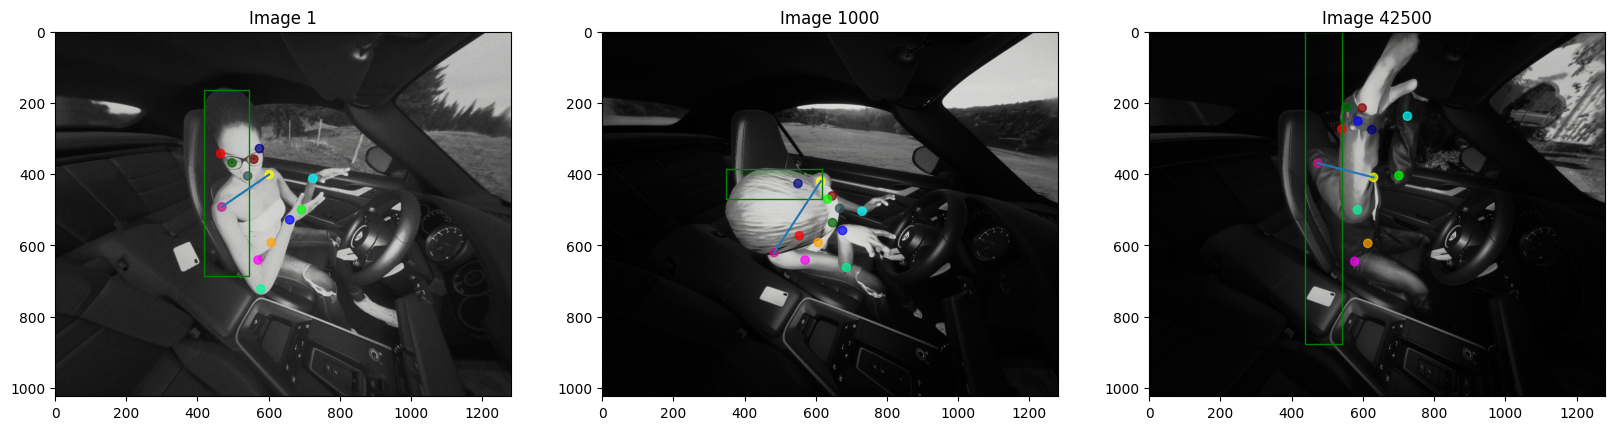

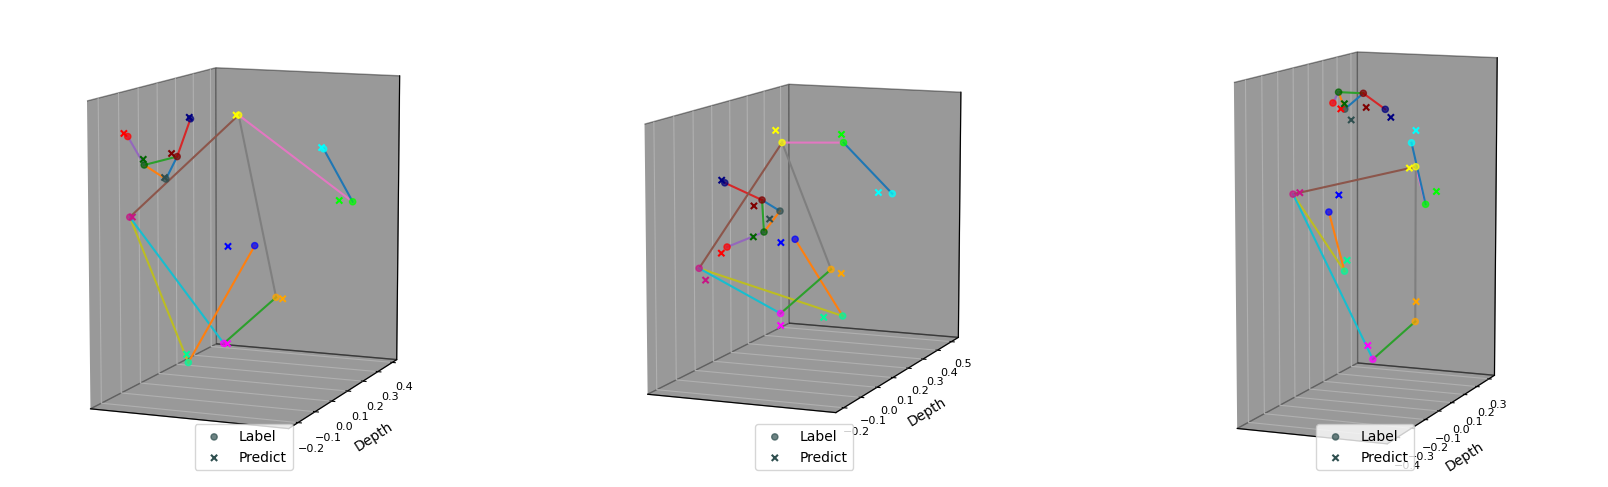

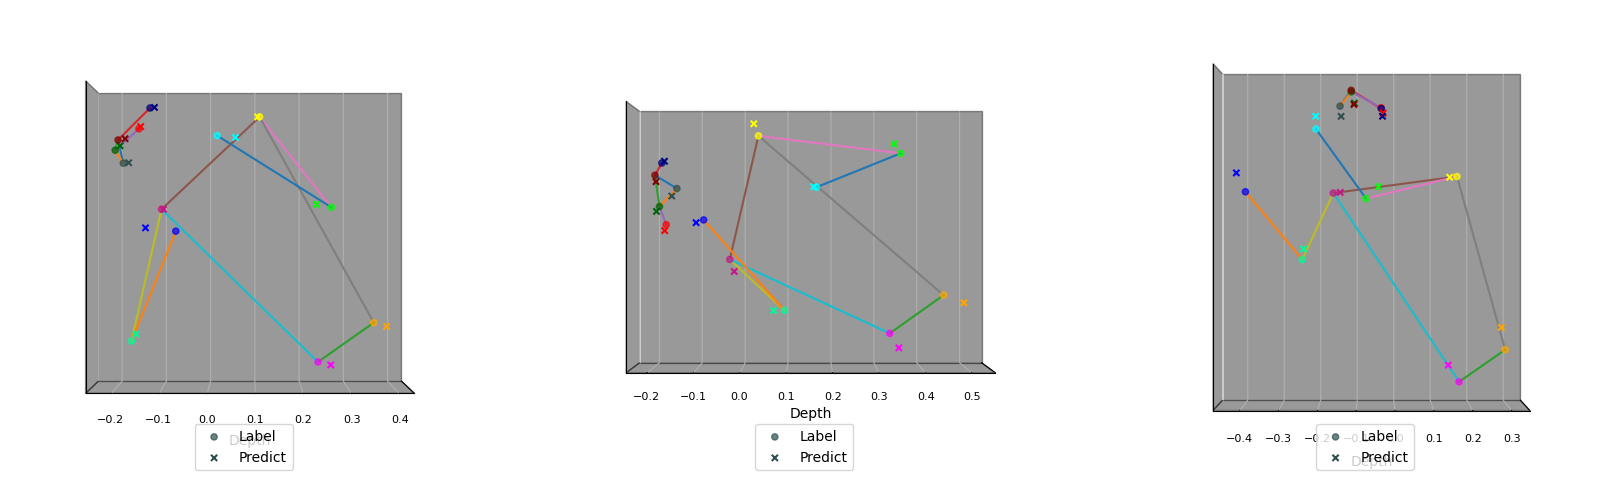

In [6]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    # img_width=image_width,
    # img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_idices=[1, 1000, 5000]
)